In [ ]:

from collections import Counter
def print_text_with_spaces(text, words_per_line):
    words = text.split()
    for i in range(0, len(words), words_per_line):
        print(" ".join(words[i:i+words_per_line]))


def decrypt(text, mapping):
    decrypted_text = ""
    for char in text:
        if char.isalpha():
            if char in mapping:
                decrypted_text += mapping[char]
            else:
                decrypted_text += "*"
        else:
            decrypted_text += char  # Preserve punctuation
    return decrypted_text

def analyze_frequency(ciphertext):
    # Remove spaces and punctuation
    ciphertext = ''.join(char for char in ciphertext if char.isalpha())
    # Count the frequency of each letter
    frequency = Counter(ciphertext)
    # Sort the letters by frequency
    sorted_frequency = sorted(frequency.items(), key=lambda x: x[1], reverse=True)
    return sorted_frequency

def algo(text, mapping, words_per_line):
    while True:
        print("Current mapping:")
        print(mapping)
        reverse_mapping = {}
        found_duplicate = False 
        for key, value in mapping.items():
          if value in reverse_mapping:
            print(f"{reverse_mapping[value]} maps to the same value as {key}: {value}")
            found_duplicate = True
            break
          else:
            reverse_mapping[value] = key 
        if found_duplicate:
          break          
        frequency_list = analyze_frequency(text)
        decrypted_text = decrypt(text, mapping)
        print("Decrypted text:")
        print_text_with_spaces(decrypted_text, words_per_line)
        
        print("Frequency list:")
        for char, freq in frequency_list:
            print(f"{char}: {freq}")
        
        replacement = input("Enter replacement (or 'q' to quit): ")
        if replacement.lower() == 'q':
            break
        if len(replacement) != 2 or replacement[0] not in 'abcdefghijklmnopqrstuvwxyz' or replacement[1] not in 'abcdefghijklmnopqrstuvwxyz':
            print("Invalid input. Please enter a valid replacement.")
            continue
        if replacement[0] in mapping.values() or replacement[1] in mapping.values():
            print("Error: One of the replacement characters is already mapped to another character.")
            continue
        mapping[replacement[0]] = replacement[1]

        # Check if any character is mapped to the same replacement
        duplicate_mapping = [char for char, mapped_char in mapping.items() if mapped_char == replacement[1] and char != replacement[0]]
        if duplicate_mapping:
            print(f"Error: Character '{duplicate_mapping[0]}' is already mapped to '{replacement[1]}'.")
            del mapping[replacement[0]]  # Rollback the mapping
            continue

text = "JGRMQOYGHMVBJ WRWQFPW HGF FDQGFPFZR KBEEBJIZQ QO CIBZK. LFAFGQVFZFWW, EOG WOPF \
GFHWOL PHLR LOLFDMFGQW BLWBWQ OL KFWBYLBLY LFS FLJGRMQBOL WJVFPFW QVHQ \
WFFP QO QVFP QO CF POGF WFJIGF QVHL HLR OQVFG \
WJVFPF OL FHGQV. QVF ILEOGQILHQF QGIQV VOSFAFG BW QVHQ WIJV \
WJVFPFW HGF IWIHZZR QGBABHZ QO CGFHX"

mapping = {}
words_per_line = 10
algo(text, mapping, words_per_line)

#### Frequency Analysis

| Character | Frequency | Character | Frequency | Character | Frequency | Character | Frequency |
|-----------|-----------|-----------|-----------|-----------|-----------|-----------|-----------|
| F         | 37        | Q         | 26        | W         | 21        | G         | 19        |
| L         | 17        | O         | 16        | V         | 15        | H         | 14        |
| B         | 12        | P         | 10        | J         | 9         | I         | 9         |
| R         | 7         | Z         | 7         | M         | 4         | E         | 4         |
| Y         | 3         | K         | 3         | C         | 3         | A         | 3         |
| D         | 2         | S         | 2         | X         | 1         |           |           |


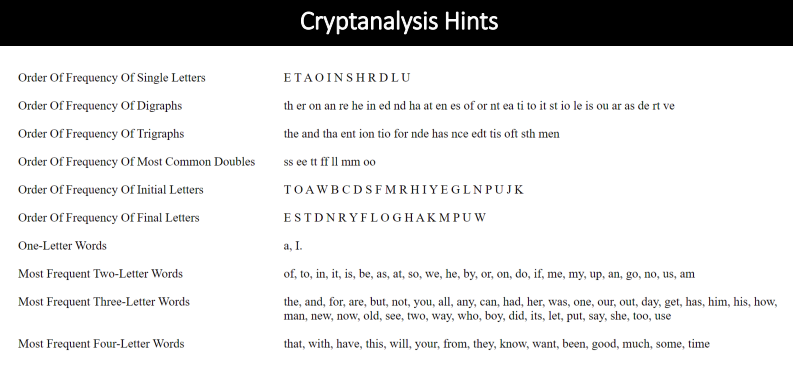

#### Frequency Analysis of the given text shows that the most frequent character is 'F' and the least frequent character is 'X'. The frequency of the characters is shown in the table above and the bar graph shows the frequency of the characters. I am going to use this frequency analysis to solve the problem.

__Current mapping:__
{'F': 'E'}
<hr>

```
Decrypted text:
************* ****E** **E E***E*E** ********* ** *****. *E*E***E*E**, *** ***E
*E**** **** ***E**E*** ****** ** *E******* *E* E********* ***E*E* ****
*EE* ** **E* ** *E ***E *E***E **** *** ***E*
***E*E ** E****. **E **********E ***** ***E*E* ** **** ****
***E*E* **E ******* ******* ** **E**
```
__Reason for the mapping:__
- The most frequent character in the encrypted text is 'F' and the most frequent character in the English language is 'E'. So, I am going to map 'F' to 'E'.

__Current mapping:__

{'F': 'E', 'Q': 'T'}
<hr>

```
Decrypted text:
****T******** ***TE** **E E*T*E*E** ********T T* *****. *E*E*T*E*E**, *** ***E
*E**** **** ***E**E*T* *****T ** *E******* *E* E*****T*** ***E*E* T**T
*EE* T* T*E* T* *E ***E *E***E T*** *** *T*E*
***E*E ** E**T*. T*E *****T***TE T**T* ***E*E* ** T**T ****
***E*E* **E ******* T****** T* **E**
```
__Reason for the mapping:__
- The second most frequent character in the encrypted text is 'Q' and the second most frequent character in the English language is 'T'. So, I am going to map 'Q' to 'T'.

__Current mapping:__
{'F': 'E', 'Q': 'T', 'O': 'O'}
<hr>

```
Decrypted text:
****TO******* ***TE** **E E*T*E*E** ********T TO *****. *E*E*T*E*E**, *O* *O*E
*E**O* **** *O*E**E*T* *****T O* *E******* *E* E*****T*O* ***E*E* T**T
*EE* TO T*E* TO *E *O*E *E***E T*** *** OT*E*
***E*E O* E**T*. T*E ***O*T***TE T**T* *O*E*E* ** T**T ****
***E*E* **E ******* T****** TO **E**
```
__Reason for the mapping:__
- There are many two letter words starting with 'T' and the most common two letter word starting with 'T' is 'TO'. So, I am going to map 'O' to 'O'.

__Current mapping:__
{'F': 'E', 'Q': 'T', 'O': 'O', 'W': 'A'}
<hr>

```
Decrypted text:
****TO******* A*ATE*A **E E*T*E*E** ********T TO *****. *E*E*T*E*EAA, *O* AO*E
*E*AO* **** *O*E**E*TA **A*AT O* *EA****** *E* E*****T*O* A**E*EA T**T
AEE* TO T*E* TO *E *O*E AE***E T*** *** OT*E*
A**E*E O* E**T*. T*E ***O*T***TE T**T* *O*E*E* *A T**T A***
A**E*EA **E *A***** T****** TO **E**
```
__Reason for the mapping:__
- This mapping is not seemed to be correct as the decrypted text is not making any sense there is not two letter word that ends with 'A'. So, I am going to change the mapping of 'W' to 'A'.

__Current mapping:__

{'F': 'E', 'Q': 'T', 'O': 'O', 'H': 'A', 'V': 'H'}
<hr>

```
Decrypted text:
****TO**A*H** ***TE** A*E E*T*E*E** ********T TO *****. *E*E*THE*E**, *O* *O*E
*EA*O* *A** *O*E**E*T* *****T O* *E******* *E* E*****T*O* **HE*E* THAT
*EE* TO THE* TO *E *O*E *E***E THA* A** OTHE*
**HE*E O* EA*TH. THE ***O*T**ATE T**TH HO*E*E* ** THAT ***H
**HE*E* A*E ***A*** T****A* TO **EA*
```
__Reason for the mapping:__
- I assume that the word  __T--T__ is __THAT__ . So, I am going to map 'V' to 'H' and 'H' to 'A'. Let's see if the decrypted text makes sense.

__Current mapping:__

{'F': 'E', 'Q': 'T', 'O': 'O', 'H': 'A', 'V': 'H', 'G': 'R'}
<hr>

```
Decrypted text:
*R**TO*RA*H** ***TE** ARE E*TRE*E** ********T TO *****. *E*ERTHE*E**, *OR *O*E
REA*O* *A** *O*E**ERT* *****T O* *E******* *E* E**R**T*O* **HE*E* THAT
*EE* TO THE* TO *E *ORE *E**RE THA* A** OTHER
**HE*E O* EARTH. THE ***ORT**ATE TR*TH HO*E*ER ** THAT ***H
**HE*E* ARE ***A*** TR***A* TO *REA*
```
__Reason for the mapping:__
- The decrypted text makes sense. So, I am going to map 'G' to 'R'. Because by mapping so I get the word __OTHER__.

__Current mapping:__

{'F': 'E', 'Q': 'T', 'O': 'O', 'H': 'A', 'V': 'H', 'G': 'R', 'S': 'W', 'A': 'V'}
<hr>

```
Decrypted text:
*R**TO*RA*H** ***TE** ARE E*TRE*E** ********T TO *****. *EVERTHE*E**, *OR *O*E
REA*O* *A** *O*E**ERT* *****T O* *E******* *EW E**R**T*O* **HE*E* THAT
*EE* TO THE* TO *E *ORE *E**RE THA* A** OTHER
**HE*E O* EARTH. THE ***ORT**ATE TR*TH HOWEVER ** THAT ***H
**HE*E* ARE ***A*** TR*V*A* TO *REA*
```
__Reason for the mapping:__
- I assume that the word __HO-E-ER__ is __HOWEVER__. So, I am going to map 'S' to 'W' and 'A' to 'V'. Let's see if the decrypted text makes sense.

__Current mapping:__

{'F': 'E', 'Q': 'T', 'O': 'O', 'H': 'A', 'V': 'H', 'G': 'R', 'S': 'W', 'A': 'V', 'P': 'M'}
<hr>

```
Decrypted text:
*R**TO*RA*H** ***TEM* ARE E*TREME** ********T TO *****. *EVERTHE*E**, *OR *OME
REA*O* MA** *O*E**ERT* *****T O* *E******* *EW E**R**T*O* **HEME* THAT
*EEM TO THEM TO *E MORE *E**RE THA* A** OTHER
**HEME O* EARTH. THE ***ORT**ATE TR*TH HOWEVER ** THAT ***H
**HEME* ARE ***A*** TR*V*A* TO *REA*
```
__Reason for the mapping:__
- I can get the words
    - __THEM__ by mapping 'P' to 'M'
    - __MORE__